In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

import numpy as np
import pandas as pd
import librosa 
from glob import glob
import random
from skimage.transform import resize
from PIL import Image
from glob import glob

In [3]:
audio_files = glob("male and female voices\\train\\*\\*.wav")
len(audio_files)

13936

In [ ]:
t = 1 # cut wave file to 1 second
def f(s_wave, rate, t):
    s_wave, _ = librosa.effects.trim(s_wave, top_db=20)
    if s_wave.shape[0] / rate < t:
        a = np.zeros((t*rate - s_wave.shape[0],))
        return np.concatenate((s_wave, a))
    else:
        return s_wave[:t*rate]

y, sr = librosa.load(audio_files[1], sr=16000)
y =f(y, sr, 2)
spec = librosa.feature.melspectrogram(y=y, sr=sr)
spec = librosa.amplitude_to_db(spec, ref=np.max)

In [ ]:
spec.shape

In [ ]:
plt.matshow(spec)

(224, 224, 3)
255 0 11.179986447704081


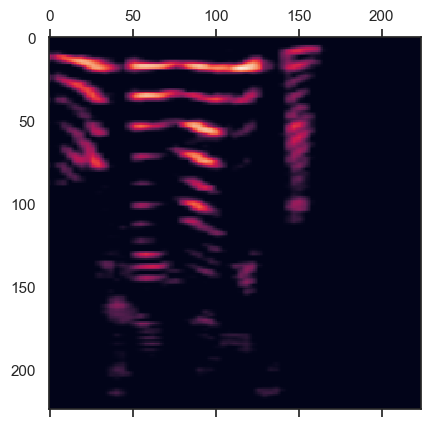

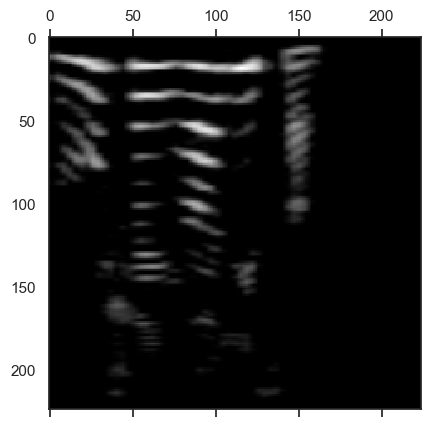

In [254]:
mfc_3d = resize(np.rollaxis(np.array([spec] * 3), 0, 3), (224, 224, 3))
print(mfc_3d.shape)  

z = (mfc_3d - mfc_3d.min())
z.min(), z.max()
z = z / z.max()
z.min(), z.max()
z = (z * 255).astype(np.uint8)

mfc_img = Image.fromarray(z, mode="RGB")
print(np.array(mfc_img).max(), np.array(mfc_img).min(), np.array(mfc_img).mean())

plt.matshow(mfc_3d[:,:,2])  
plt.matshow(mfc_img)
plt.show()

In [6]:
for i, fp in enumerate(audio_files):
    y, sr = librosa.load(audio_files[i], sr=16000)
    y = f(y, sr, t)
    spec = librosa.feature.melspectrogram(y=y, sr=sr)
    spec = librosa.amplitude_to_db(spec, ref=np.max)
    mfc_3d = resize(np.rollaxis(np.array([spec] * 3), 0, 3), (224, 224, 3))
    
    z = (mfc_3d - mfc_3d.min())
    z.min(), z.max()
    z = z / z.max()
    z.min(), z.max()
    z = (z * 255).astype(np.uint8)
    
    mfc_img = Image.fromarray(z, mode="RGB")

    path = fp.split('\\')[-1][:-4] + '.jpg'
    path = 'mfcc\\train\\train\\' + path
    mfc_img.save(path)
    if i % 50 == 0:
        print(i, end=' ')

0 50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850 900 950 1000 1050 1100 1150 1200 1250 1300 1350 1400 1450 1500 1550 1600 1650 1700 1750 1800 1850 1900 1950 2000 2050 2100 2150 2200 2250 2300 2350 2400 2450 2500 2550 2600 2650 2700 2750 2800 2850 2900 2950 3000 3050 3100 3150 3200 3250 3300 3350 3400 3450 3500 3550 3600 3650 3700 3750 3800 3850 3900 3950 4000 4050 4100 4150 4200 4250 4300 4350 4400 4450 4500 4550 4600 4650 4700 4750 4800 4850 4900 4950 5000 5050 5100 5150 5200 5250 5300 5350 5400 5450 5500 5550 5600 5650 5700 5750 5800 5850 5900 5950 6000 6050 6100 6150 6200 6250 6300 6350 6400 6450 6500 6550 6600 6650 6700 6750 6800 6850 6900 6950 7000 7050 7100 7150 7200 7250 7300 7350 7400 7450 7500 7550 7600 7650 7700 7750 7800 7850 7900 7950 8000 8050 8100 8150 8200 8250 8300 8350 8400 8450 8500 8550 8600 8650 8700 8750 8800 8850 8900 8950 9000 9050 9100 9150 9200 9250 9300 9350 9400 9450 9500 9550 9600 9650 9700 9750 9800 9850 9900 9950 10000 10050 10100 10150

In [7]:
df = pd.read_csv(r"male and female voices\train\train\targets.tsv", sep='\t', \
                      names=['id', 'gender'])

path = 'mfcc\\train\\train\\' + df.iloc[0]['id'] + '.jpg'
with Image.open(path) as im:
    im.show()

In [3]:
jpg_files = glob("mfcc\\train\\*\\*.jpg")
len(jpg_files)

13936

In [259]:
test_files = glob("male and female voices\\test\\*\\*.wav")
len(test_files)

def f(s_wave, rate, t):
    s_wave, _ = librosa.effects.trim(s_wave, top_db=20)
    if s_wave.shape[0] / rate < t:
        a = np.zeros((t*rate - s_wave.shape[0],))
        return np.concatenate((s_wave, a))
    else:
        return s_wave[:t*rate]

for i, fp in enumerate(test_files):
    y, sr = librosa.load(test_files[i], sr=16000)
    y = f(y, sr, t)
    spec = librosa.feature.melspectrogram(y=y, sr=sr)
    spec = librosa.amplitude_to_db(spec, ref=np.max)
    mfc_3d = resize(np.rollaxis(np.array([spec] * 3), 0, 3), (224, 224, 3))
    
    z = (mfc_3d - mfc_3d.min())
    z.min(), z.max()
    z = z / z.max()
    z.min(), z.max()
    z = (z * 255).astype(np.uint8)
    
    mfc_img = Image.fromarray(z, mode="RGB")

    path = fp.split('\\')[-1][:-4] + '.jpg'
    path = 'mfcc\\test\\test\\' + path
    mfc_img.save(path)
    if i % 50 == 0:
        print(i, end=' ')

0 50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850 900 950 1000 1050 1100 1150 1200 1250 1300 1350 1400 1450 1500 1550 1600 1650 1700 1750 1800 1850 1900 1950 2000 2050 2100 2150 2200 2250 2300 2350 2400 2450 2500 2550 2600 2650 2700 2750 2800 2850 2900 2950 3000 3050 3100 3150 3200 3250 3300 3350 3400 

In [262]:
jpg_files = glob("mfcc\\test\\*\\*.jpg")
len(jpg_files)

3413